In [52]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [51]:
import ct_datasets

In [54]:
dd = ct_datasets.get_data("total")

In [88]:
%timeit a = dd[0]

1.37 ms ± 8.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [87]:
a

{'img': array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]]),
 'lab': array([], dtype=float64),
 'source': 0}

In [85]:
a['img']

NpzFile '/home/users/joecohen/scratch/data-scratch/Totalsegmentator_dataset//cache//s0000_0.npz' with keys: arr_0

In [89]:
# for image_id, row in dd.csv.groupby('image_id'):
#     for frame in row.frame:
    

In [52]:
dd[0]

{'from_cache': True,
 'img': array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]]),
 'lab': array([], dtype=float64),
 'source': 0}

In [49]:
%timeit e = dd[0]

98.6 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit e = dd[1]

cache
cache
cache
cache
cache
cache
cache
179 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
e['img'][...,None].repeat(3,2).shape

(294, 192, 3)

In [93]:
dd.datasets[0].raw_csv.iloc[744]

image_id                         s0864
age                                 55
gender                               f
institute                            A
study_type    ct thorax-abdomen-pelvis
split                            train
Name: 744, dtype: object

In [101]:
broken_zips = ['s0864']

In [104]:
csv = dd.datasets[0].raw_csv[~dd.datasets[0].raw_csv.image_id.isin(broken_zips)]

In [100]:
~dd.datasets[0].raw_csv.image_id.isin()

0       s0000
1       s0001
2       s0002
3       s0003
4       s0004
        ...  
1199    s1400
1200    s1401
1201    s1403
1202    s1404
1203    s1405
Name: image_id, Length: 1204, dtype: object

In [105]:
csv.image_id

0       s0000
1       s0001
2       s0002
3       s0003
4       s0004
        ...  
1199    s1400
1200    s1401
1201    s1403
1202    s1404
1203    s1405
Name: image_id, Length: 1203, dtype: object

In [46]:
import nibabel as nib

In [99]:
#path = "/home/users/joecohen/group/joecohen/Totalsegmentator_dataset/"

In [70]:
path = "/home/users/joecohen/scratch/data-scratch/Totalsegmentator_dataset/"

In [108]:
for iid in tqdm(csv.image_id[774:]):
    a = nib.load(path + iid + "/ct.nii.gz")
    b = a.get_fdata()

  0%|          | 0/429 [00:00<?, ?it/s]

In [97]:
a = nib.load(path + "s0864/ct.nii.gz")

In [98]:
b = a.get_fdata()

BadGzipFile: CRC check failed 0x5ab25329 != 0x84f031a9

In [19]:
%timeit a = nib.load("/tmp/test.nii.gz")

799 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
%timeit a.get_fdata()[:,:,0]

The slowest run took 7.89 times longer than the fastest. This could mean that an intermediate result is being cached.
2.99 µs ± 3.44 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit a.get_fdata()[:,:,0]

1.14 µs ± 3.75 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
ddd.dataset.csv.frame_height > 128

In [40]:
(ddd.dataset.csv.frame_height > 128) & (ddd.dataset.csv.frame_width > 128)

0         True
1         True
2         True
3         True
4         True
          ... 
312786    True
312787    True
312788    True
312789    True
312790    True
Length: 312791, dtype: bool

In [11]:
import sys

In [12]:
sys.path.insert(0,"/home/users/joecohen/workspace/taming-transformers/")

In [13]:
import taming, taming.data, taming.data.ct

In [41]:
ddd = taming.data.ct.CTTrain(128, "total")

  0%|          | 0/1204 [00:00<?, ?it/s]

In [44]:
ddd.dataset

{}


SubsetDataset num_samples=292802
└ of MergeDataset num_samples=312791
  └0 TotalSegmenter_Dataset num_samples=312791
  

In [25]:
ddd[4]['image'].shape

(128, 128)

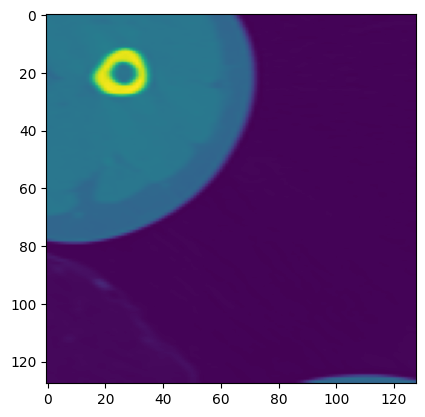

In [42]:
plt.imshow(ddd[4]['image']);

In [19]:
img = dd[4]['img']

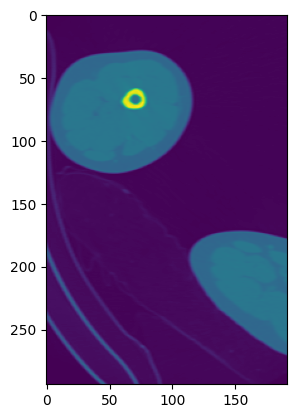

In [20]:
plt.imshow(img)

In [109]:
a={}

In [4]:
#a.update(csv.iloc[0])

In [5]:
# for i, row in csv.iterrows():
#     print(row)

In [6]:
path = "/home/users/joecohen/group/joecohen/Totalsegmentator_dataset/"

In [7]:
csv = pd.read_csv(path + 'meta.csv', delimiter=';')

In [8]:
csv

,image_id,age,gender,institute,study_type,split
0,s0000,32,f,H,ct pelvis,val
1,s0001,59,f,H,ct abdomen-pelvis,train
2,s0002,49,f,H,ct thorax-neck,train
3,s0003,51,f,H,ct spine,train
4,s0004,72,f,C,ct thorax-abdomen-pelvis,train
...,...,...,...,...,...,...
1199,s1400,67,m,H,ct angiography thorax-abdomen-pelvis,train
1200,s1401,49,f,H,ct angiography abdomen-pelvis,train
1201,s1403,59,m,H,ct angiography abdomen-pelvis,train
1202,s1404,61,f,H,ct angiography thorax-abdomen-pelvis,train


In [9]:
import nibabel as nib

In [90]:
sizes = []
for image_id in tqdm(csv.image_id):
    g = nib.load(path + image_id + "/ct.nii.gz")
    meta = {
        'image_id': image_id,
        'frame': list(range(g.shape[2])),
        'frame_height':g.shape[0],
        'frame_width': g.shape[1],
    }
    meta.update(dict(g.header))
    sizes.append(meta)
    #print(image_id, g.shape, g.get_data_dtype())

  0%|          | 0/1204 [00:00<?, ?it/s]

In [91]:
df = pd.DataFrame(sizes)

In [94]:
df = df.explode('frame')

In [95]:
len(df)

312791

In [96]:
df

,image_id,frame,frame_height,frame_width,sizeof_hdr,data_type,db_name,extents,session_error,regular,...,quatern_c,quatern_d,qoffset_x,qoffset_y,qoffset_z,srow_x,srow_y,srow_z,intent_name,magic
0,s0000,0,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,1,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,2,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,3,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,4,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,s1405,282,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'
1203,s1405,283,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'
1203,s1405,284,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'
1203,s1405,285,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'


In [100]:
df['frame_height'].min()

47

In [99]:
df['frame_width'].min()

48

In [86]:
g = nib.load(path + "s0001/ct.nii.gz")

In [87]:
#g.get_fdata()

In [88]:
img = g.get_fdata()

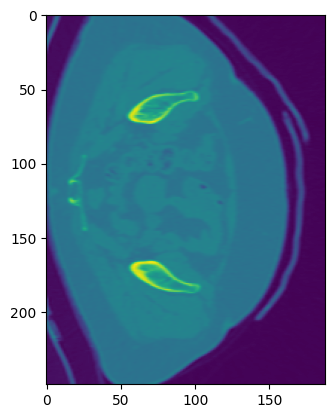

In [89]:
plt.imshow(img[:,:,50]);

In [10]:
d = ct_datasets.TotalSegmenter_Dataset(path)

  0%|          | 0/1204 [00:00<?, ?it/s]